## Аналитика

Импортируем нужные библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные и проверим взгляним на них.

In [ ]:
model = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

In [ ]:
df = (model, city)
display(model, city)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [ ]:
for i in df:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

In [ ]:
for i in df:
    display(i.describe())

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [ ]:
for i in df:
    display(i.isna().mean())
    display(f'Количество дубликатов {i.duplicated().sum()}')

model             0.0
flights_amount    0.0
dtype: float64

'Количество дубликатов 0'

city               0.0
average_flights    0.0
dtype: float64

'Количество дубликатов 0'

# Вывод:
После загрузки данных ни чего аномального не обноружено. Типы данных впорядке. Пропусков или дубликатов нет. В распределении данных нет ни чего аномального.

Создадим таблицу с топ-10 городов.

In [ ]:
top10_city = city.sort_values('average_flights', ascending=False).head(10)
top10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


По ней видно, что самый поплуряный город по среднему количеству рейсво это Москва. Еще в сильном отрыве Питер, а остальные не так уж и популярны.

Построим график моделей самолета и рейсов на них

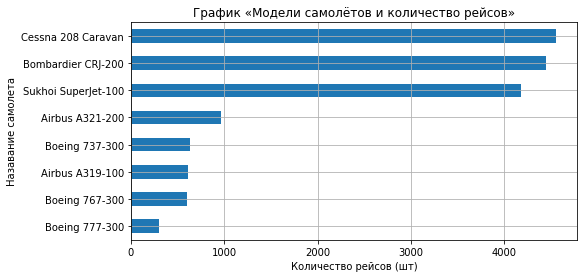

In [ ]:
model.set_index('model').sort_values('flights_amount').plot(y='flights_amount',
                                                            figsize=(8,4),
                                                            kind='barh',
                                                            grid=True,
                                                            label='Количество рейсов',
                                                            legend=False
                                                           )
plt.title('График «Модели самолётов и количество рейсов»')
plt.xlabel('Количество рейсов (шт)')
plt.ylabel('Назавание самолета')
plt.show()

Видим, что первая тройка самолетов это пассажирские, но маленькие самолеты. Они чаще всего летают т.к. там мало человек и соответственно, чтобы взлететь нужно мало билетов продать. Остальные самолеты у нас крупные и на них меньше соответственно полетов т.к. для взлета нужно больше билетов продать, а это занимает не мало времени.

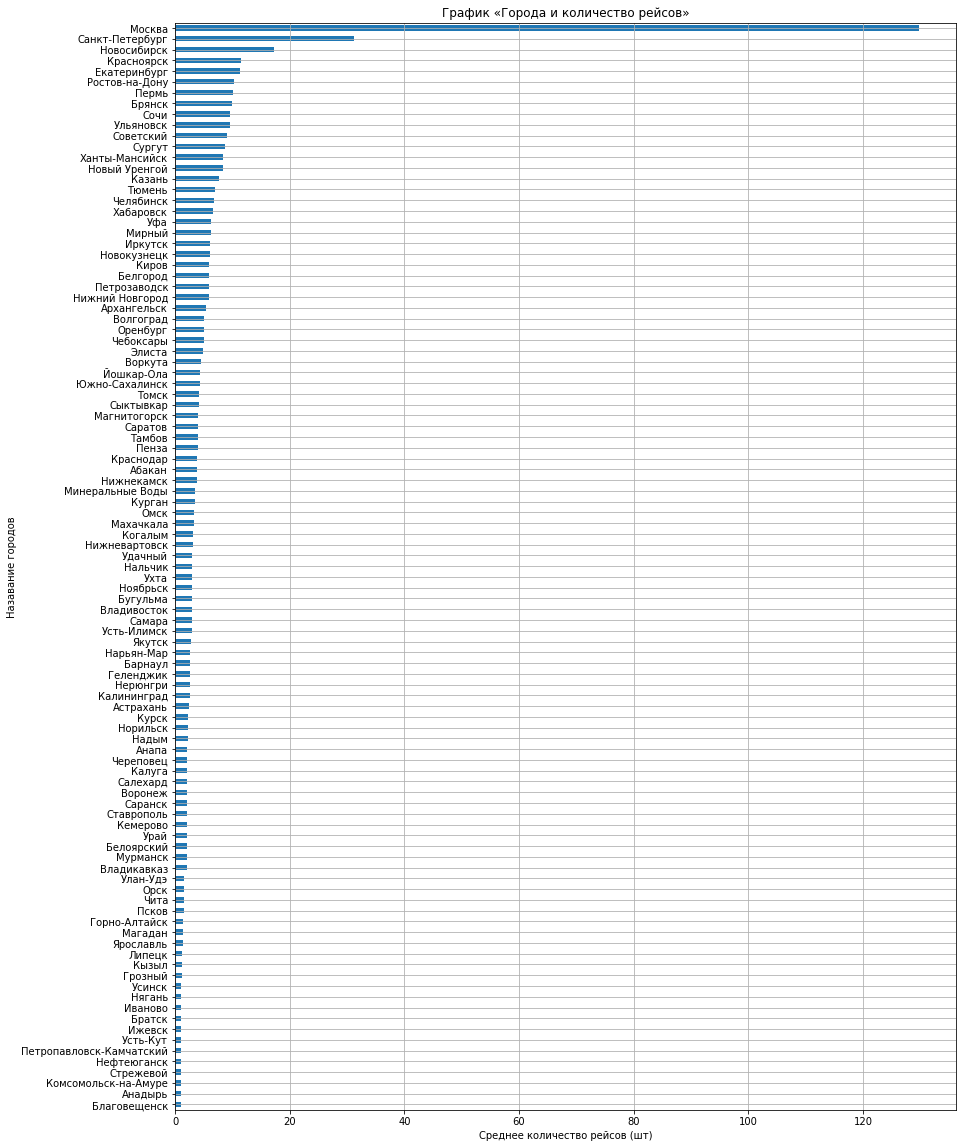

In [ ]:
city.set_index('city').sort_values('average_flights').plot(y='average_flights',
                                                           kind='barh',
                                                           figsize=(14,20),
                                                           grid=True,
                                                           label='Среднее количество рейсов',
                                                           legend=False
                                                          )
plt.title('График «Города и количество рейсов»')
plt.xlabel('Среднее количество рейсов (шт)')
plt.ylabel('Назавание городов')
plt.show()

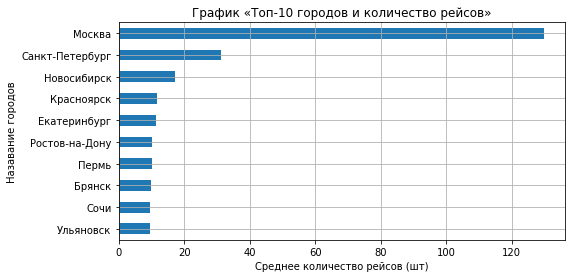

In [ ]:
top10_city.set_index('city').sort_values('average_flights').plot(y='average_flights',
                                                                 kind='barh',
                                                                 figsize=(8,4),
                                                                 grid=True,
                                                                 label='Среднее количество рейсов',
                                                                 legend=False
                                                                )
plt.title('График «Топ-10 городов и количество рейсов»')
plt.xlabel('Среднее количество рейсов (шт)')
plt.ylabel('Назавание городов')
plt.show()

По графику топ-10 и все города можно сказать, что самые частые рейсы в Москву и в Питер, а еще в Новосибирс. Остальные города все идут на убыль и пользуются не большим спросом.

# Общий вывод:
В ходе анализа выяснил, что:
* Самое большое количество рейсов выполняют самолеты небольшой дальности, для их перелета нужно продать меньше билетов и тем самым можно полететь в ближайшие даты ;
* Самое большое количество рейсов выполняется в самые крупные города России.